In [1]:
%load_ext sql


In [2]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://lrn61010:4s713hc-4w4nvbv4@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: lrn61010@BLUDB'

In [3]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


ProgrammingError: (ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('[IBM][CLI Driver] SQL0438N  Application raised error or warning with diagnostic text: "Exceeded maximum limit of 5 connections. Connection refused".  SQLSTATE=42502\r SQLCODE=-438')
(Background on this error at: http://sqlalche.me/e/f405)

In [4]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [5]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
78


In [6]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
38


In [7]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
98.0


In [8]:
## We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

## or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

## or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 


 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [9]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * ibm_db_sa://lrn61010:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


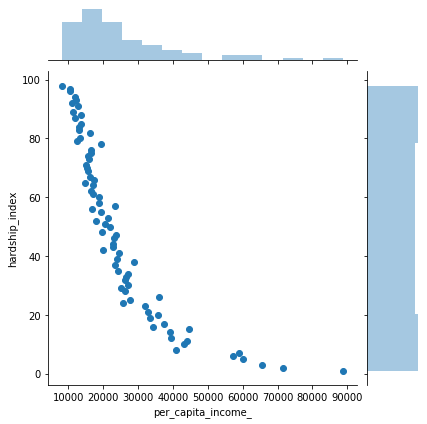

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())